# Using SQL and Pandas to perform basic data analytics
This notebook looks to address certain business problems by executing sql queries with the help of the python package, pandas.
Moreover basic data visualizations will be done to compare the data.

In [1]:
# import libraries
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Retrieve relevant credentials securely
user_name = os.environ.get('DB_USER')
password = os.environ.get('DB_PASS')


In [3]:
# Create connection to local mysql server
connection = mysql.connector.connect(host = 'localhost',
                                      user = user_name,
                                      passwd = password,
                                      db = 'airbnbdb')

In [4]:
connection

## Queries

We'll be using airbnb listings dataset from three major Canadian cities; Toronto, Vancouver, and Quebec City.

In [5]:
listings_table = pd.read_sql_query('SHOW TABLES FROM airbnbdb', connection)

In [6]:
print(listings_table)

     Tables_in_airbnbdb
0  quebec_city_listings
1      toronto_listings
2    vancouver_listings


There are 3 tables within this database. As a primary step we will look at the table's schema to see the data types and see if and where we might be able to join tables for queries.

In [7]:
# Create a series of the tables and their schema
tables = listings_table['Tables_in_airbnbdb']

In [8]:
for table_name in tables:
    output = pd.read_sql_query('DESCRIBE {}'.format(table_name), connection)
    print(table_name)
    print(output, '\n')

quebec_city_listings
                                           Field             Type Null  Key  \
0                                             id  b'int unsigned'   NO  PRI   
1                                    listing_url          b'text'  YES        
2                                      scrape_id        b'bigint'  YES        
3                                   last_scraped          b'text'  YES        
4                                           name          b'text'  YES        
..                                           ...              ...  ...  ...   
69                calculated_host_listings_count           b'int'  YES        
70   calculated_host_listings_count_entire_homes           b'int'  YES        
71  calculated_host_listings_count_private_rooms           b'int'  YES        
72   calculated_host_listings_count_shared_rooms           b'int'  YES        
73                             reviews_per_month        b'double'  YES        

   Default Extra  
0     None 

After taking a look at the schemas, we can see that 'id' is the primary key for each of the tables. Additionally there are multiple columns such as room, beds, acommodates and price which can serve as a metric for average pricing. Whereas neighbourhood_cleansed, property_type and price can be used in classifying neighbourhood prices and accommdations. All of which will be addressed in the upcoming queries. 


### Question 1: 
Which neighbourhoods have the most expensive average price per bed?

In [9]:
q1_query_toronto = 'SELECT neighbourhood_cleansed AS neighbourhood, AVG(trim(replace(price, "$", "") + 0.0))/AVG(beds) AS avg_price_per_bed\
                    FROM airbnbdb.toronto_listings\
                    GROUP BY neighbourhood_cleansed\
                    ORDER BY avg_price_per_bed DESC;'

q1_toronto_df = pd.read_sql_query(q1_query_toronto, connection)
print(q1_toronto_df)
print('\n')
print(q1_toronto_df.head())

                        neighbourhood  avg_price_per_bed
0                      Dufferin Grove         149.000000
1                 Bay Street Corridor         120.000000
2               Church-Yonge Corridor         105.500000
3   Waterfront Communities-The Island         100.000000
4                             Niagara          89.500000
5                 Rosedale-Moore Park          89.000000
6                  Danforth East York          89.000000
7                     South Riverdale          87.500000
8                   High Park-Swansea          80.000000
9                     Little Portugal          79.888889
10                     South Parkdale          77.500000
11                              Annex          76.000000
12                           Oakridge          74.500000
13                        The Beaches          70.000000
14               Briar Hill-Belgravia          67.000000
15                    High Park North          66.000000
16                Lawrence Park

Here we see NaN for the last 4 row entries. Looking back at the csv files, it shows that their beds columns have a value of 0, resulting in a divide by zero error. As a result we will not change those values, but will choose to omit those entries from question. We will choose the top 5 entries for avg_price_per_bed.

Avg Price/Bed in Toronto neighbourhoods
                       neighbourhood  avg_price_per_bed
0                     Dufferin Grove              149.0
1                Bay Street Corridor              120.0
2              Church-Yonge Corridor              105.5
3  Waterfront Communities-The Island              100.0
4                            Niagara               89.5


Avg Price/Bed in Vancouver neighbourhoods
    neighbourhood  avg_price_per_bed
0        Fairview              156.0
1  Mount Pleasant               95.0
2        West End               85.0
3        Downtown               79.0
4         Marpole               75.0


Avg Price/Bed in Quebec City neighbourhoods
                                   neighbourhood  avg_price_per_bed
0                                  Saint-Sauveur         283.333333
1                                     Saint-Roch         150.000000
2  Vieux-QuÃ©bec/Cap-Blanc/Colline parlementaire          83.750000
3                                      C

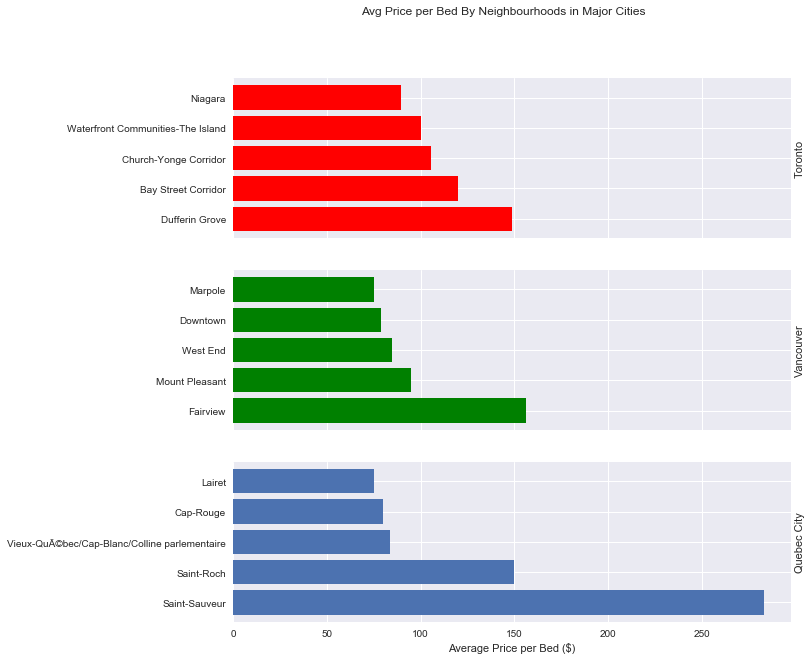

In [10]:
q1_query_toronto = 'SELECT neighbourhood_cleansed AS neighbourhood, AVG(trim(replace(price, "$", "") + 0.0))/AVG(beds) AS avg_price_per_bed\
                    FROM airbnbdb.toronto_listings\
                    GROUP BY neighbourhood_cleansed\
                    ORDER BY avg_price_per_bed DESC;'

q1_query_vancouver = 'SELECT neighbourhood_cleansed AS neighbourhood, AVG(trim(replace(price, "$", "") + 0.0))/AVG(beds) AS avg_price_per_bed\
                      FROM airbnbdb.vancouver_listings\
                      GROUP BY neighbourhood_cleansed\
                      ORDER BY avg_price_per_bed DESC;'

q1_query_quebec = 'SELECT neighbourhood_cleansed AS neighbourhood, AVG(trim(replace(price, "$", "") + 0.0))/AVG(beds) AS avg_price_per_bed\
                   FROM airbnbdb.quebec_city_listings\
                   GROUP BY neighbourhood_cleansed\
                   ORDER BY avg_price_per_bed DESC;'

#Create DataFrames to view sql queries
q1_toronto_df = pd.read_sql_query(q1_query_toronto, connection)
q1_vancouver_df = pd.read_sql_query(q1_query_vancouver, connection)
q1_quebec_df = pd.read_sql_query(q1_query_quebec, connection)

# Display dataframes
print('Avg Price/Bed in Toronto neighbourhoods')
print(q1_toronto_df.head())
print('\n')
print('Avg Price/Bed in Vancouver neighbourhoods')
print(q1_vancouver_df.head())
print('\n')
print('Avg Price/Bed in Quebec City neighbourhoods')
print(q1_quebec_df.head())

# Create Subplots for easy comparison
plt.style.use('seaborn')
fig,ax = plt.subplots(3,1, sharex=True, figsize=(10,10))
ax[0].barh(q1_toronto_df['neighbourhood'][:5], q1_toronto_df['avg_price_per_bed'][:5], color= 'r')
ax[1].barh(q1_vancouver_df['neighbourhood'][:5], q1_vancouver_df['avg_price_per_bed'][:5], color='g')
ax[2].barh(q1_quebec_df['neighbourhood'][:5], q1_quebec_df['avg_price_per_bed'][:5])

ax[0].set_ylabel('Toronto')
ax[0].yaxis.set_label_position('right')

ax[1].set_ylabel('Vancouver')
ax[1].yaxis.set_label_position('right')

ax[2].set_ylabel('Quebec City')
ax[2].yaxis.set_label_position('right')
ax[2].set_xlabel('Average Price per Bed ($)')

plt.suptitle('Avg Price per Bed By Neighbourhoods in Major Cities')
plt.show()

Here we can see the top five neighbourhoods by major city in terms of average price per bed. Intuition would have you believe that the highest prices would be in the downtown core of each city. This hypothesis holds true for the listed neighbourhoods of Toronto and Quebec City. Additionally, this occurs to be true except for Marpole, Vancouver which is located at the very south of Vancouver.

On another note, these results can seem misleading given that a small sample size in listings per neighbourhood can skew the mean, leading to false perception of the average price per bed by neighbourhood. As a result these findings must be taken at only face value and not a true estimator of the neighbourhood. The next question will further address this concern. 

## Question 2:
Which neighbourhoods have the most listings?


Number of Listings by Neighbourhoods in Toronto
                        neighbourhood  number_of_listings
0                             Niagara                  10
1               Church-Yonge Corridor                   7
2   Waterfront Communities-The Island                   4
3                      South Parkdale                   3
4                     Little Portugal                   2
5                Briar Hill-Belgravia                   2
6                            Oakridge                   2
7                 Rosedale-Moore Park                   2
8                  Caledonia-Fairbank                   2
9                   Greenwood-Coxwell                   1
10                Mount Pleasant West                   1
11                        The Beaches                   1
12                   Wexford/Maryvale                   1
13                Bay Street Corridor                   1
14                     Dufferin Grove                   1
15                    So

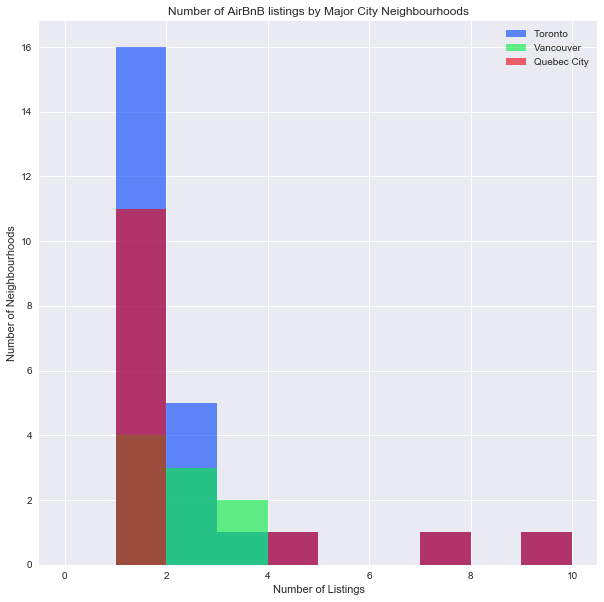

In [11]:
q2_query_toronto = 'SELECT neighbourhood_cleansed AS neighbourhood, COUNT(neighbourhood_cleansed) AS number_of_listings\
                    FROM airbnbdb.toronto_listings\
                    GROUP BY neighbourhood_cleansed\
                    ORDER BY number_of_listings DESC;'

q2_query_vancouver = 'SELECT neighbourhood_cleansed AS neighbourhood, COUNT(neighbourhood_cleansed) AS number_of_listings\
                    FROM airbnbdb.vancouver_listings\
                    GROUP BY neighbourhood_cleansed\
                    ORDER BY number_of_listings DESC;'

q2_query_quebec = 'SELECT neighbourhood_cleansed AS neighbourhood, COUNT(neighbourhood_cleansed) AS number_of_listings\
                    FROM airbnbdb.quebec_city_listings\
                    GROUP BY neighbourhood_cleansed\
                    ORDER BY number_of_listings DESC;'

q2_toronto_df = pd.read_sql_query(q2_query_toronto, connection)
q2_vancouver_df = pd.read_sql_query(q2_query_vancouver, connection)
q2_quebec_df = pd.read_sql_query(q2_query_quebec, connection)

print('Number of Listings by Neighbourhoods in Toronto')
print(q2_toronto_df)
print('\n')
print('Number of Listings by Neighbourhoods in Vancouver')
print(q2_vancouver_df)
print('\n')
print('Number of Listings by Neighbourhoods in Quebec City')
print(q2_quebec_df)

bins = [0,1,2,3,4,5,6,7,8,9,10]
plt.style.use('seaborn-bright')
plt.figure(figsize=(10,10))
ax = plt.hist(q2_toronto_df['number_of_listings'], bins, histtype='bar', alpha=0.6, label='Toronto')
ay = plt.hist(q2_vancouver_df['number_of_listings'], bins, histtype='bar', alpha=0.6, label='Vancouver')
az = plt.hist(q2_quebec_df['number_of_listings'], bins, histtype='bar', alpha=0.6, label= 'Quebec City')

plt.title('Number of AirBnB listings by Major City Neighbourhoods')
plt.ylabel('Number of Neighbourhoods')
plt.xlabel('Number of Listings')
plt.legend(loc='upper right')
plt.show()

Its clear that the sample size for calculating the mean price per bed, is very small. As we can see most neighbourhoods in each of the cities have 1-2 listings, which may not accurately represent the actual price per bed for those neighbourhoods. Therefore, these average quantities must be taken with a grain of salt, and the small sample size is a flaw of the dataset. A larger dataset would paint a more accurate picture.

## Question 3:
Which property types on average are more expensive?

Avg Price of Airbnb Property Types - Toronto
                          property_type        room_type  \
0                      Entire townhouse  Entire home/apt   
1               Entire residential home  Entire home/apt   
2            Entire condominium (condo)  Entire home/apt   
3                    Entire guest suite  Entire home/apt   
4                    Entire rental unit  Entire home/apt   
5              Private room in bungalow     Private room   
6                           Entire loft  Entire home/apt   
7           Private room in rental unit     Private room   
8             Private room in townhouse     Private room   
9      Private room in residential home     Private room   
10  Private room in condominium (condo)     Private room   

    avg_price_of_property_type  
0                   278.500000  
1                   173.125000  
2                   115.666667  
3                   107.000000  
4                   104.764706  
5                    93.000000  
6  

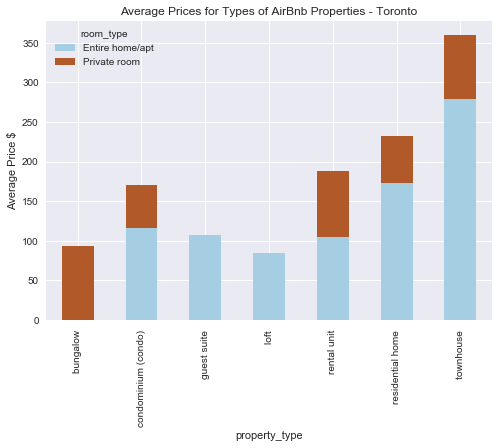

In [12]:
q3_toronto_query = 'SELECT property_type, room_type, AVG(trim(replace(price, "$", "") + 0.0)) AS avg_price_of_property_type\
                    FROM airbnbdb.toronto_listings\
                    GROUP BY property_type\
                    ORDER BY avg_price_of_property_type DESC;'

q3_toronto_df = pd.read_sql_query(q3_toronto_query, connection)

print('Avg Price of Airbnb Property Types - Toronto')
print(q3_toronto_df)
print('\n')
print('\n')
print('vvv CLEAN DATA vvv')
print('\n')
print('Here the data is cleaned, to group the similar property types, and then pivot tables are made to be used in stacked bar charts.')
print('\n')

# Cleaning data to use in visualization
def df_cleaner(df_col):
    data = df_col.split()
    for i in df_col:
        if 'in' in data and not 'Entire' in data:
            idx = data.index('in')
        if 'Entire' in data and not 'in' in data:
            idx = data.index('Entire')
        df_col = data[idx+1:]
        new_val = ''
        for word in df_col:
            new_val += word + ' '
    return new_val

#Apply df_cleaner to each dataframe
q3_toronto_df['property_type'] = q3_toronto_df['property_type'].apply(lambda x: df_cleaner(x))
print('Below is the cleaned dataframe')
print('\n')
print(q3_toronto_df)
print('\n')

# Create pivot tavles from dataframes for visualizations
pivot_toronto = q3_toronto_df.pivot(index='property_type', columns='room_type',values='avg_price_of_property_type').fillna(0)

print('vvv PIVOT TABLES vvv')
print('\n')
print('Avg Price of Airbnb Property Types - Toronto')
print(pivot_toronto)
print('\n')

# Data Visualizations
plt.style.use('seaborn-darkgrid')
pivot_toronto.plot.bar(stacked=True, colormap= 'Paired')
plt.ylabel('Average Price $')
plt.title('Average Prices for Types of AirBnb Properties - Toronto')
plt.show()

Avg Price of Airbnb Property Types - Vancouver
                         property_type        room_type  \
0                   Entire rental unit  Entire home/apt   
1                   Entire guest suite  Entire home/apt   
2              Entire residential home  Entire home/apt   
3           Entire condominium (condo)  Entire home/apt   
4     Private room in residential home     Private room   
5  Private room in condominium (condo)     Private room   

   avg_price_of_property_type  
0                  145.333333  
1                  140.000000  
2                  132.500000  
3                  121.500000  
4                   96.000000  
5                   50.000000  


vvv CLEAN DATA vvv


Here the data is cleaned, to group the similar property types, and then pivot tables are made to be used in stacked bar charts.


Below is the cleaned dataframe


          property_type        room_type  avg_price_of_property_type
0          rental unit   Entire home/apt                  14

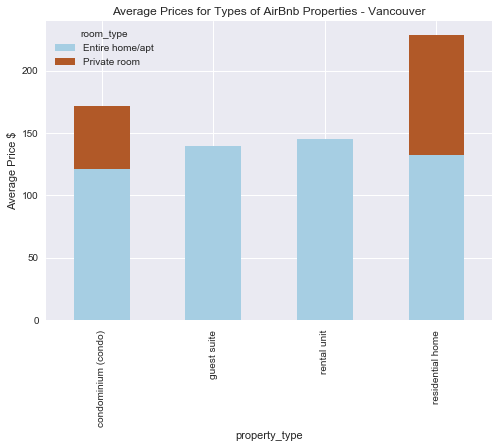

In [13]:
# Vancouver

q3_vancouver_query = 'SELECT property_type, room_type, AVG(trim(replace(price, "$", "") + 0.0)) AS avg_price_of_property_type\
                    FROM airbnbdb.vancouver_listings\
                    GROUP BY property_type\
                    ORDER BY avg_price_of_property_type DESC;'

q3_vancouver_df = pd.read_sql_query(q3_vancouver_query, connection)

print('Avg Price of Airbnb Property Types - Vancouver')
print(q3_vancouver_df)
print('\n')
print('vvv CLEAN DATA vvv')
print('\n')
print('Here the data is cleaned, to group the similar property types, and then pivot tables are made to be used in stacked bar charts.')
print('\n')

# Cleaning data to use in visualization
def df_cleaner(df_col):
    data = df_col.split()
    for i in df_col:
        if 'in' in data and not 'Entire' in data:
            idx = data.index('in')
        if 'Entire' in data and not 'in' in data:
            idx = data.index('Entire')
        df_col = data[idx+1:]
        new_val = ''
        for word in df_col:
            new_val += word + ' '
    return new_val

q3_vancouver_df['property_type'] = q3_vancouver_df['property_type'].apply(lambda x: df_cleaner(x))
print('Below is the cleaned dataframe')
print('\n')
print(q3_vancouver_df)
print('\n')

# Create pivot tavles from dataframes for visualizations
pivot_vancouver = q3_vancouver_df.pivot(index='property_type', columns='room_type',values='avg_price_of_property_type').fillna(0)

print('vvv PIVOT TABLE vvv')
print('\n')
print('Avg Price of Airbnb Property Types - Vancouver')
print(pivot_vancouver)
print('\n')

# Data Visualization
plt.style.use('seaborn-darkgrid')
pivot_vancouver.plot.bar(stacked=True, colormap = 'Paired')
plt.ylabel('Average Price $')
plt.title('Average Prices for Types of AirBnb Properties - Vancouver')
plt.show()

Avg Price of Airbnb Property Types - Quebec City
                        property_type        room_type  \
0                    Entire townhouse  Entire home/apt   
1                        Entire house  Entire home/apt   
2                    Entire apartment  Entire home/apt   
3   Private room in bed and breakfast     Private room   
4           Room in bed and breakfast       Hotel room   
5              Room in boutique hotel     Private room   
6                  Entire condominium  Entire home/apt   
7        Private room in nature lodge     Private room   
8           Entire serviced apartment  Entire home/apt   
9                  Entire guest suite  Entire home/apt   
10          Private room in townhouse     Private room   
11            Private room in cottage     Private room   
12              Private room in house     Private room   

    avg_price_of_property_type  
0                   340.000000  
1                   246.333333  
2                   172.750000  
3     

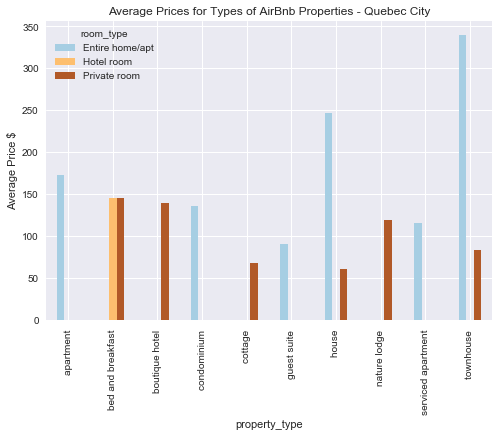

In [14]:
# Quebec City

q3_quebec_query = 'SELECT property_type, room_type, AVG(trim(replace(price, "$", "") + 0.0)) AS avg_price_of_property_type\
                    FROM airbnbdb.quebec_city_listings\
                    GROUP BY property_type\
                    ORDER BY avg_price_of_property_type DESC;'

q3_quebec_df = pd.read_sql_query(q3_quebec_query, connection)

print('Avg Price of Airbnb Property Types - Quebec City')
print(q3_quebec_df)
print('\n')
print('vvv CLEAN DATA vvv')
print('\n')
print('Here the data is cleaned, to group the similar property types, and then pivot tables are made to be used in stacked bar charts.')
print('\n')

# Cleaning data to use in visualization
def df_cleaner(df_col):
    """Clean property_type column to return just the base string for the property,
    free from 'Entire' and 'Private room in'.
    """
    data = df_col.split()
    for i in df_col:
        if 'in' in data and not 'Entire' in data:
            idx = data.index('in')
        if 'Entire' in data and not 'in' in data:
            idx = data.index('Entire')
        df_col = data[idx+1:]
        new_val = ''
        for word in df_col:
            new_val += word + ' '
    return new_val

q3_quebec_df['property_type'] = q3_quebec_df['property_type'].apply(lambda x: df_cleaner(x))
print('Below is the cleaned dataframe')
print('\n')
print(q3_quebec_df)
print('\n')

# Create pivot tavles from dataframes for visualizations
pivot_quebec = q3_quebec_df.pivot(index='property_type', columns='room_type',values='avg_price_of_property_type').fillna(0)

print('vvv PIVOT TABLE vvv')
print('\n')
print('Avg Price of Airbnb Property Types - Quebec City')
print(pivot_quebec)
print('\n')

# Data Visualizations
plt.style.use('seaborn-darkgrid')
pivot_quebec.plot.bar(colormap= 'Paired')
plt.ylabel('Average Price $')
plt.title('Average Prices for Types of AirBnb Properties - Quebec City')
plt.show()

After executing the sql query, we can see that there is much varierty among the property_type column in the dataframes. In addition, there appears to be other qualifiers in the property_type column to sort the data; "Entire" and "Private room". This is redundant given that the room_type column exists. Therefore we can clean the data to only have the base property_type in that column. 

Afterwards, pivot tables can be made by grouping property_type and room_type from the dataframes to create a cohesive stacked bar chart. In the pivot tables columns with no value (NaN) were replaced with 0.0, so that it can be used in data visualizations.

After analysis it is obvious that an entire property type would be more expensive than a private room. In addition it makes sense that houses would be more expensive than apartments and condos. However it seems surprising that townhouses are more expensive than houses given that one would assume that houses would have more space. This could be due to many factors such as a more desirable location, larger square footage, premium finishes were installed in the townhouse and etc. 

On another note, while Toronto and Vancouver have similar listings, Quebec City 5 property_types which are not listed for both of the other major cities, including a hotel room. Perhaps there are AirBnb property type regulations which state that certain property types are not allowed to be listed, which differ from province to province. Additionally Toronto and Vancouver are larger cities than Quebec City, where certain property types like townhouses, houses and condos are more readily required to house their massive populations. Whereas properties like cottages, bed and breakfasts, and nature lodges are located outside of Toronto and Vancouver but are contained within the less densely populated city of Quebec. 

## Question 4:
Which property types are the most listed?

Total Number of Property Types - Toronto
                          property_type        room_type  \
0                    Entire rental unit  Entire home/apt   
1               Entire residential home  Entire home/apt   
2      Private room in residential home     Private room   
3            Entire condominium (condo)  Entire home/apt   
4           Private room in rental unit     Private room   
5                      Entire townhouse  Entire home/apt   
6                    Entire guest suite  Entire home/apt   
7              Private room in bungalow     Private room   
8   Private room in condominium (condo)     Private room   
9             Private room in townhouse     Private room   
10                          Entire loft  Entire home/apt   

    number_of_property_type  
0                        17  
1                         8  
2                         6  
3                         6  
4                         5  
5                         2  
6                         2 

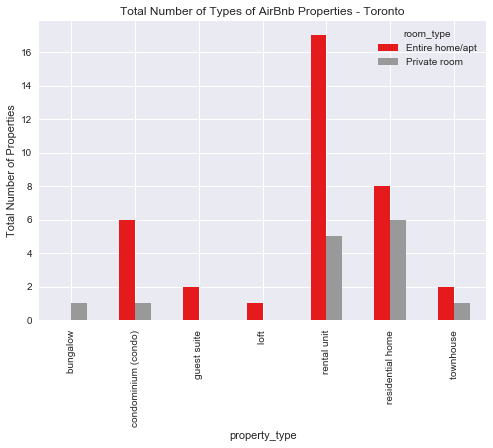

In [15]:
# Toronto

q4_toronto_query = 'SELECT property_type, room_type, COUNT(property_type) AS number_of_property_type\
                    FROM airbnbdb.toronto_listings\
                    GROUP BY property_type\
                    ORDER BY number_of_property_type DESC;'

# Create Dataframes
q4_toronto_df = pd.read_sql_query(q4_toronto_query, connection)

print('Total Number of Property Types - Toronto')
print(q4_toronto_df)
print('\n')

print('vvv CLEAN DATA vvv')
print('\n')
print('Here the data is cleaned, to group the similar property types, and then pivot tables are made to be used in stacked bar charts.')
print('\n')

# Cleaning data to use in visualization
def df_cleaner(df_col):
    """Clean property_type column to return just the base string for the property,
    free from 'Entire' and 'Private room in'.
    """
    data = df_col.split()
    for i in df_col:
        if 'in' in data and not 'Entire' in data:
            idx = data.index('in')
        if 'Entire' in data and not 'in' in data:
            idx = data.index('Entire')
        df_col = data[idx+1:]
        new_val = ''
        for word in df_col:
            new_val += word + ' '
    return new_val

q4_toronto_df['property_type'] = q4_toronto_df['property_type'].apply(lambda x: df_cleaner(x))
print('Below is the cleaned dataframe')
print('\n')
print(q4_toronto_df)
print('\n')

# Create pivot tavles from dataframes for visualizations
pivot_toronto = q4_toronto_df.pivot_table(index='property_type', columns='room_type',values='number_of_property_type').fillna(0)

print('vvv PIVOT TABLE vvv')
print('\n')
print('Avg Price of Airbnb Property Types - Toronto')
print(pivot_toronto)
print('\n')

# Data Visualizations
plt.style.use('seaborn')
pivot_toronto.plot.bar(colormap= 'Set1')
plt.ylabel('Total Number of Properties')
plt.title('Total Number of Types of AirBnb Properties - Toronto')
plt.show()

Total Number of Property Types - Vancouver
                         property_type        room_type  \
0              Entire residential home  Entire home/apt   
1     Private room in residential home     Private room   
2                   Entire rental unit  Entire home/apt   
3           Entire condominium (condo)  Entire home/apt   
4                   Entire guest suite  Entire home/apt   
5  Private room in condominium (condo)     Private room   

   number_of_property_type  
0                        4  
1                        4  
2                        3  
3                        2  
4                        2  
5                        1  


vvv CLEAN DATA vvv


Here the data is cleaned, to group the similar property types, and then pivot tables are made to be used in stacked bar charts.


Below is the cleaned dataframe


          property_type        room_type  number_of_property_type
0     residential home   Entire home/apt                        4
1     residential home

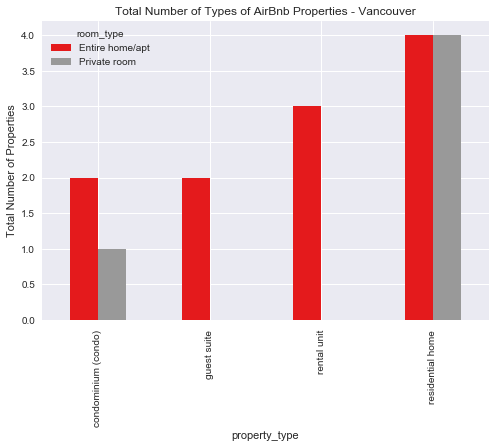

In [16]:
# Vancouver

q4_vancouver_query = 'SELECT property_type, room_type, COUNT(property_type) AS number_of_property_type\
                      FROM airbnbdb.vancouver_listings\
                      GROUP BY property_type\
                      ORDER BY number_of_property_type DESC;'

# Create Dataframe
q4_vancouver_df = pd.read_sql_query(q4_vancouver_query, connection)

print('Total Number of Property Types - Vancouver')
print(q4_vancouver_df)
print('\n')

print('vvv CLEAN DATA vvv')
print('\n')
print('Here the data is cleaned, to group the similar property types, and then pivot tables are made to be used in stacked bar charts.')
print('\n')

# Cleaning data to use in visualization
def df_cleaner(df_col):
    """Clean property_type column to return just the base string for the property,
    free from 'Entire' and 'Private room in'.
    """
    data = df_col.split()
    for i in df_col:
        if 'in' in data and not 'Entire' in data:
            idx = data.index('in')
        if 'Entire' in data and not 'in' in data:
            idx = data.index('Entire')
        df_col = data[idx+1:]
        new_val = ''
        for word in df_col:
            new_val += word + ' '
    return new_val

q4_vancouver_df['property_type'] = q4_vancouver_df['property_type'].apply(lambda x: df_cleaner(x))
print('Below is the cleaned dataframe')
print('\n')
print(q4_vancouver_df)
print('\n')

# Create pivot tavles from dataframes for visualizations
pivot_vancouver = q4_vancouver_df.pivot(index='property_type', columns='room_type',values='number_of_property_type').fillna(0)

print('vvv PIVOT TABLE vvv')
print('\n')
print('Avg Price of Airbnb Property Types - Vancouver')
print(pivot_vancouver)
print('\n')

# Data Visualizations
plt.style.use('seaborn')
pivot_vancouver.plot.bar(colormap= 'Set1')
plt.ylabel('Total Number of Properties')
plt.title('Total Number of Types of AirBnb Properties - Vancouver')
plt.show()

Total Number of Property Types - Quebec City
                        property_type        room_type  \
0                    Entire apartment  Entire home/apt   
1               Private room in house     Private room   
2                        Entire house  Entire home/apt   
3        Private room in nature lodge     Private room   
4           Entire serviced apartment  Entire home/apt   
5   Private room in bed and breakfast     Private room   
6           Private room in townhouse     Private room   
7                    Entire townhouse  Entire home/apt   
8             Private room in cottage     Private room   
9           Room in bed and breakfast       Hotel room   
10                 Entire condominium  Entire home/apt   
11                 Entire guest suite  Entire home/apt   
12             Room in boutique hotel     Private room   

    number_of_property_type  
0                        12  
1                         4  
2                         3  
3                     

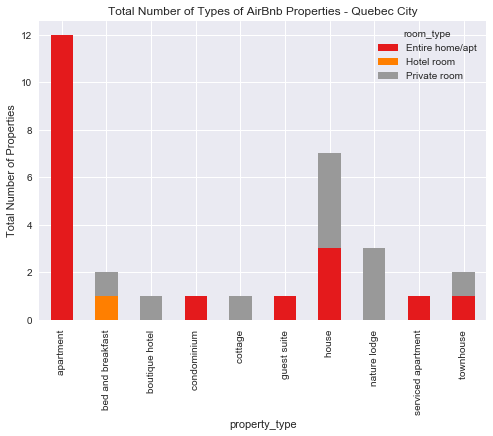

In [17]:
# Quebec City

q4_quebec_query = 'SELECT property_type, room_type, COUNT(property_type) AS number_of_property_type\
                    FROM airbnbdb.quebec_city_listings\
                    GROUP BY property_type\
                    ORDER BY number_of_property_type DESC;'

# Create Dataframe
q4_quebec_df = pd.read_sql(q4_quebec_query, connection)

print('Total Number of Property Types - Quebec City')
print(q4_quebec_df)
print('\n')

print('vvv CLEAN DATA vvv')
print('\n')
print('Here the data is cleaned, to group the similar property types, and then pivot tables are made to be used in stacked bar charts.')
print('\n')

# Cleaning data to use in visualization
def df_cleaner(df_col):
    """Clean property_type column to return just the base string for the property,
    free from 'Entire' and 'Private room in'.
    """
    data = df_col.split()
    for i in df_col:
        if 'in' in data and not 'Entire' in data:
            idx = data.index('in')
        if 'Entire' in data and not 'in' in data:
            idx = data.index('Entire')
        df_col = data[idx+1:]
        new_val = ''
        for word in df_col:
            new_val += word + ' '
    return new_val

q4_quebec_df['property_type'] = q4_quebec_df['property_type'].apply(lambda x: df_cleaner(x))
print('Below is the cleaned dataframe')
print('\n')
print(q4_quebec_df)
print('\n')

# Create pivot tavles from dataframes for visualizations
pivot_quebec = q4_quebec_df.pivot(index='property_type', columns='room_type',values='number_of_property_type').fillna(0)

print('vvv PIVOT TABLE vvv')
print('\n')
print('Avg Price of Airbnb Property Types - Quebec City')
print(pivot_quebec)
print('\n')

# Data Visualizations
plt.style.use('seaborn')
pivot_quebec.plot.bar(stacked=True, colormap= 'Set1')
plt.ylabel('Total Number of Properties')
plt.title('Total Number of Types of AirBnb Properties - Quebec City')
plt.show()

From the bar charts we can see that apartments, houses and rental units are among the most listed property types. Furthermore there were more listings of entire properties compared to private rooms. This is most likely because entire property listings generate more revenue on average, as answered by the previous questions. 

## Question 5:
What is the average price per bed by property type?

In [18]:
q5_toronto_query = 'SELECT property_type, room_type, AVG(trim(replace(price, "$", "") + 0.0))/AVG(beds) AS avg_price_per_bed\
                 FROM airbnbdb.toronto_listings\
                 GROUP BY property_type\
                 ORDER BY avg_price_per_bed DESC;'

q5_toronto_df = pd.read_sql_query(q5_toronto_query, connection)
print(q5_toronto_df)

                          property_type        room_type  avg_price_per_bed
0                    Entire guest suite  Entire home/apt         214.000000
1            Entire condominium (condo)  Entire home/apt         115.666667
2                    Entire rental unit  Entire home/apt         104.764706
3                      Entire townhouse  Entire home/apt          92.833333
4               Entire residential home  Entire home/apt          86.562500
5                           Entire loft  Entire home/apt          85.000000
6           Private room in rental unit     Private room          83.600000
7             Private room in townhouse     Private room          81.000000
8      Private room in residential home     Private room          59.166667
9   Private room in condominium (condo)     Private room          55.000000
10             Private room in bungalow     Private room          46.500000


Once again, an elegant solution to this problem would require cleaning the data to group the base property terms and then group by room_type for a clearer answer. 

Avg Price/Bed By Property Type - Toronto
                          property_type        room_type  avg_price_per_bed
0                    Entire guest suite  Entire home/apt         214.000000
1            Entire condominium (condo)  Entire home/apt         115.666667
2                    Entire rental unit  Entire home/apt         104.764706
3                      Entire townhouse  Entire home/apt          92.833333
4               Entire residential home  Entire home/apt          86.562500
5                           Entire loft  Entire home/apt          85.000000
6           Private room in rental unit     Private room          83.600000
7             Private room in townhouse     Private room          81.000000
8      Private room in residential home     Private room          59.166667
9   Private room in condominium (condo)     Private room          55.000000
10             Private room in bungalow     Private room          46.500000


Avg Price/Bed by Property Type - Toronto
room

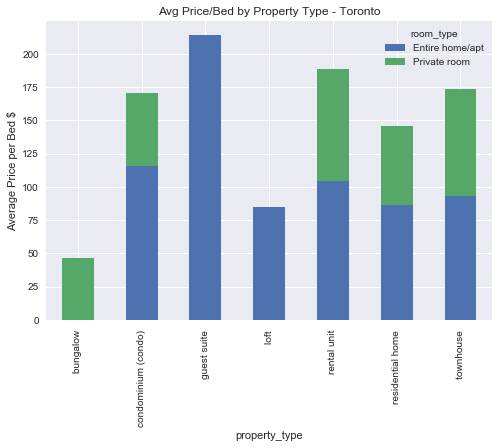

In [19]:
# Toronto
q5_toronto_query = 'SELECT property_type, room_type, AVG(trim(replace(price, "$", "") + 0.0))/AVG(beds) AS avg_price_per_bed\
                    FROM airbnbdb.toronto_listings\
                    GROUP BY property_type\
                    ORDER BY avg_price_per_bed DESC;'

# Create Dataframes
q5_toronto_df = pd.read_sql_query(q5_toronto_query, connection)
print('Avg Price/Bed By Property Type - Toronto')
print(q5_toronto_df)
print('\n')

# Cleaning data to use in visualization
def df_cleaner(df_col):
    """Clean property_type column to return just the base string for the property,
    free from 'Entire' and 'Private room in'.
    """
    data = df_col.split()
    for i in df_col:
        if 'in' in data and not 'Entire' in data:
            idx = data.index('in')
        if 'Entire' in data and not 'in' in data:
            idx = data.index('Entire')
        df_col = data[idx+1:]
        new_val = ''
        for word in df_col:
            new_val += word + ' '
    return new_val

# Cleaned Data
q5_toronto_df['property_type'] = q5_toronto_df['property_type'].apply(lambda x: df_cleaner(x))

# Pivot the data for visualizations
pivot_toronto = q5_toronto_df.pivot(index='property_type', columns='room_type', values='avg_price_per_bed').fillna(0)
print('Avg Price/Bed by Property Type - Toronto')
print(pivot_toronto)
print('\n')

# Visualization
plt.style.use('seaborn')
pivot_toronto.plot.bar(stacked=True)
plt.ylabel('Average Price per Bed $')
plt.title('Avg Price/Bed by Property Type - Toronto')
plt.show()

Avg Price/Bed By Property Type - Vancouver
                         property_type        room_type  avg_price_per_bed
0                   Entire rental unit  Entire home/apt         145.333333
1           Entire condominium (condo)  Entire home/apt          81.000000
2     Private room in residential home     Private room          76.800000
3                   Entire guest suite  Entire home/apt          56.000000
4  Private room in condominium (condo)     Private room          50.000000
5              Entire residential home  Entire home/apt          44.166667


Avg Price/Bed by Property Type - Vancouver
room_type             Entire home/apt  Private room
property_type                                      
condominium (condo)         81.000000          50.0
guest suite                 56.000000           0.0
rental unit                145.333333           0.0
residential home            44.166667          76.8




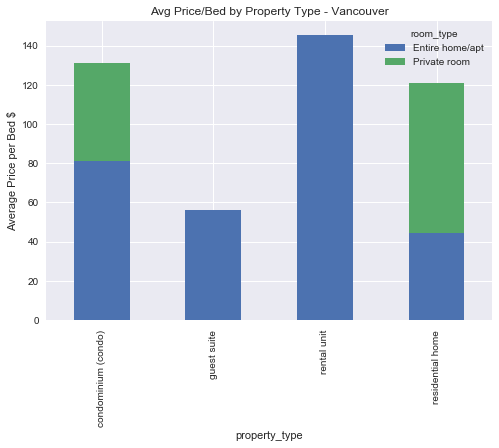

In [20]:
# Vancouver
q5_vancouver_query = 'SELECT property_type, room_type, AVG(trim(replace(price, "$", "") + 0.0))/AVG(beds) AS avg_price_per_bed\
                 FROM airbnbdb.vancouver_listings\
                 GROUP BY property_type\
                 ORDER BY avg_price_per_bed DESC;'

# Create Dataframe
q5_vancouver_df = pd.read_sql_query(q5_vancouver_query, connection)
print('Avg Price/Bed By Property Type - Vancouver')
print(q5_vancouver_df)
print('\n')

# Cleaning data to use in visualization
def df_cleaner(df_col):
    """Clean property_type column to return just the base string for the property,
    free from 'Entire' and 'Private room in'.
    """
    data = df_col.split()
    for i in df_col:
        if 'in' in data and not 'Entire' in data:
            idx = data.index('in')
        if 'Entire' in data and not 'in' in data:
            idx = data.index('Entire')
        df_col = data[idx+1:]
        new_val = ''
        for word in df_col:
            new_val += word + ' '
    return new_val

# Apply Function to clean the data
q5_vancouver_df['property_type'] = q5_vancouver_df['property_type'].apply(lambda x: df_cleaner(x))

# Pivot the data for visualizations
pivot_vancouver = q5_vancouver_df.pivot(index='property_type', columns='room_type', values='avg_price_per_bed').fillna(0)
print('Avg Price/Bed by Property Type - Vancouver')
print(pivot_vancouver)
print('\n')

# Visualization
plt.style.use('seaborn')
pivot_vancouver.plot.bar(stacked=True)
plt.ylabel('Average Price per Bed $')
plt.title('Avg Price/Bed by Property Type - Vancouver')
plt.show()

Avg Price/Bed By Property Type - Quebec City
                        property_type        room_type  avg_price_per_bed
0           Room in bed and breakfast       Hotel room             145.00
1              Room in boutique hotel     Private room             139.00
2           Private room in townhouse     Private room              83.00
3                    Entire apartment  Entire home/apt              82.92
4                        Entire house  Entire home/apt              73.90
5   Private room in bed and breakfast     Private room              72.50
6        Private room in nature lodge     Private room              71.60
7                    Entire townhouse  Entire home/apt              68.00
8             Private room in cottage     Private room              68.00
9                  Entire condominium  Entire home/apt              67.50
10          Entire serviced apartment  Entire home/apt              57.50
11              Private room in house     Private room             

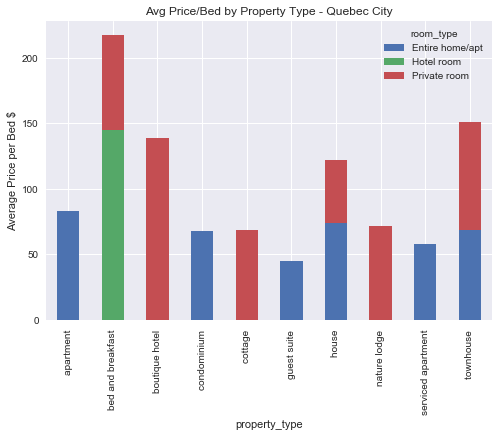

In [21]:
# Quebec City
q5_quebec_query = 'SELECT property_type, room_type, AVG(trim(replace(price, "$", "") + 0.0))/AVG(beds) AS avg_price_per_bed\
                 FROM airbnbdb.quebec_city_listings\
                 GROUP BY property_type\
                 ORDER BY avg_price_per_bed DESC;'

# Create Dataframe
q5_quebec_df = pd.read_sql_query(q5_quebec_query, connection)
print('Avg Price/Bed By Property Type - Quebec City')
print(q5_quebec_df)
print('\n')

# Cleaning data to use in visualization
def df_cleaner(df_col):
    """Clean property_type column to return just the base string for the property,
    free from 'Entire' and 'Private room in'.
    """
    data = df_col.split()
    for i in df_col:
        if 'in' in data and not 'Entire' in data:
            idx = data.index('in')
        if 'Entire' in data and not 'in' in data:
            idx = data.index('Entire')
        df_col = data[idx+1:]
        new_val = ''
        for word in df_col:
            new_val += word + ' '
    return new_val

# Apply Function to clean the data
q5_quebec_df['property_type'] = q5_quebec_df['property_type'].apply(lambda x: df_cleaner(x))

# Pivot the data for visualizations
pivot_quebec = q5_quebec_df.pivot(index='property_type', columns='room_type', values='avg_price_per_bed').fillna(0)
print('Avg Price/Bed by Property Type - Quebec City')
print(pivot_quebec)
print('\n')

# Visualization
plt.style.use('seaborn')
pivot_quebec.plot.bar(stacked=True)
plt.ylabel('Average Price per Bed $')
plt.title('Avg Price/Bed by Property Type - Quebec City')
plt.show()

Taking a glance at all the data, we can see that for Toronto and Vancouver the properties that have the highest average price per bed are entire guest suites, condos and rental units. Quebec City does not follow this trend as it has more unique properties of various prices. The properties with the lowest average prices per bed are private rooms in residential homes and condos. Whereas Quebec City has entire guest suites as their lowest, Interesting!

Continuing with the trend in the previous questions, we can see that usually the average price per bed is higher for entire property listings than it is for rooms. However in Toronto, there is only an $11 difference between the bed price at an entire townhouse and a private room in a townhouse. Likewise, this trend extends to Vancouver as the price of a bed in a private room in a residential home is higher than an entire residential home. Similar to Toronto, Quebec City has a listing in which the average price per bed in a private room at a townhouse is higher than the entire townhouse listing. 

This could all be explained by the small sample size as discussed in question 1, where the mean is skewed because of it. However another explanation could be that private rooms are sources of income for owners that are trying to maximize their revenue. The price of a private room in a townhouse is most likely cheaper than an entire townhouse listing on airbnb but in terms of price per bed, the private room is a worse deal, as it is more expensive. If thought about in general sales practices, buying one item compared to buying the same item in bulk, the purchasing power of your dollar presents greater yield when buying in bulk as there is more value. This seems to be the case here with the average price per bed in a private room at a townhouse being more expensive than at an entire townhouse.

## Question 6:
What percentage of airbnb listings have a foreign investor?

Host Locations for Foreign Investors - Toronto
                            host_location listing_city
0     Vancouver, British Columbia, Canada      Toronto
1      Madrid, Community of Madrid, Spain      Toronto
2                                      US      Toronto
3  Los Angeles, California, United States      Toronto
4                                 Andorra      Toronto
5      Wainscott, New York, United States      Toronto


Total listings - Toronto:
   COUNT(host_location)
0                    50


Percent of airbnb listings owned by a Foreign Investor - Toronto:
12.0




Host Locations for Foreign Investors - Vancouver
  host_location listing_city
0            CA    Vancouver


Total listings - Vancouver:
   COUNT(host_location)
0                    16


Percent of airbnb listings owned by a Foreign Investor - Vancouver:
6.25




Host Locations for Foreign Investors - Quebec City
                           host_location listing_city
0                                     CA  Queb

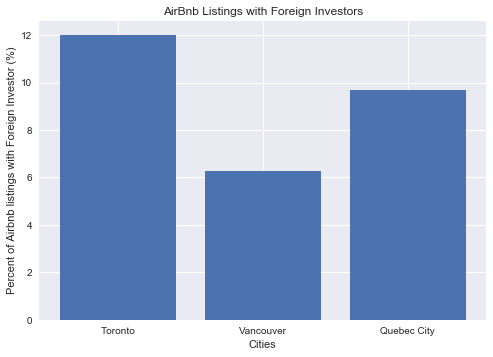

In [22]:
q6_toronto_query_1 = 'SELECT host_location\
                    FROM airbnbdb.toronto_listings\
                    WHERE host_location NOT LIKE "%oronto%";'

q6_toronto_query_2 = 'SELECT COUNT(host_location)\
                      FROM airbnbdb.toronto_listings;'

q6_toronto_df = pd.read_sql_query(q6_toronto_query_1, connection)
q6_toronto_df['listing_city'] = 'Toronto'
print('Host Locations for Foreign Investors - Toronto')
print(q6_toronto_df)
print('\n')
toronto_count = pd.read_sql_query(q6_toronto_query_2, connection)
print('Total listings - Toronto:')
print(toronto_count)
print('\n')
print('Percent of airbnb listings owned by a Foreign Investor - Toronto:')
percent_toronto = ((q6_toronto_df.shape[0])/(toronto_count['COUNT(host_location)'])*100)[0]
print(percent_toronto)
print('\n')
print('\n')

q6_vancouver_query_1 = 'SELECT host_location\
                      FROM airbnbdb.vancouver_listings\
                      WHERE host_location NOT LIKE "%vancouver%";'

q6_vancouver_query_2 = 'SELECT COUNT(host_location)\
                        FROM airbnbdb.vancouver_listings;'

q6_vancouver_df = pd.read_sql_query(q6_vancouver_query_1, connection)
q6_vancouver_df['listing_city'] = 'Vancouver'
print('Host Locations for Foreign Investors - Vancouver')
print(q6_vancouver_df)
print('\n')
vancouver_count = pd.read_sql_query(q6_vancouver_query_2, connection)
print('Total listings - Vancouver:')
print(vancouver_count)
print('\n')
print('Percent of airbnb listings owned by a Foreign Investor - Vancouver:')
percent_vancouver = ((q6_vancouver_df.shape[0])/(vancouver_count['COUNT(host_location)'])*100)[0]
print(percent_vancouver)
print('\n')
print('\n')

q6_quebec_query_1 = 'SELECT host_location\
                   FROM airbnbdb.quebec_city_listings\
                   WHERE host_location NOT LIKE "%quebec%"\
                   AND host_location NOT LIKE "%QuÃ©bec%";'

q6_quebec_query_2 = 'SELECT COUNT(host_location)\
                     FROM airbnbdb.quebec_city_listings;'

q6_quebec_df = pd.read_sql_query(q6_quebec_query_1, connection)
q6_quebec_df['listing_city'] = 'Quebec City'
print('Host Locations for Foreign Investors - Quebec City')
print(q6_quebec_df)
print('\n')
quebec_count = pd.read_sql_query(q6_quebec_query_2, connection)
print('Total listings - Quebec City:')
print(quebec_count)
print('\n')
print('Percent of airbnb listings owned by a Foreign Investor - Quebec City:')
percent_quebec = round(((q6_quebec_df.shape[0])/(quebec_count['COUNT(host_location)'])*100)[0], 2)
print(percent_quebec)
print('\n')
print('\n')

# Data Visualization
labels = ['Toronto', 'Vancouver', 'Quebec City']
values = [percent_toronto, percent_vancouver, percent_quebec]
plt.figure()
ax = plt.bar(labels, values)
plt.xlabel('Cities')
plt.ylabel('Percent of Airbnb listings with Foreign Investor (%)')
plt.title('AirBnb Listings with Foreign Investors')
plt.show()

Here we see that Toronto has the most foreign investors, given it is the largest of the cities. While Vancouver has a limited sample size to show true reality of foreign investing. 

This is where we will stop our analysis. More to come!